# Data Wrangling Capstone 2

### Abstract

With the growing popularity of Airbnb in New York City, hosts face increasing challenges in pricing their listings competitively and effectively. The goal is to develop a predictive modeling framework to assist both prospective and current Airbnb hosts in making data-driven pricing decisions. Using historical listing data, including property features, neighborhood demographics, and pricing trends, we will perform data cleaning and exploratory analysis to uncover factors influencing rental prices. A regression-based model will be built to predict optimal listing prices, supported by additional models for pricing optimization and demand forecasting. The goal is to provide hosts with actionable insights to improve their market entry strategy and maximize rental performance in NYC’s competitive short-term rental landscape.

In [1]:
!pip install folium

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from IPython.display import display, Markdown


### Initial Inspection

Before cleaning the data, it is important to inspect the structure of the dataset. We check the data types, non-null counts, and basic statistics to identify missing values, column types, and any potential outliers or anomalies.

In [4]:
df = pd.read_csv('AB_NYC_2019.csv')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [6]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### Drop Irrelevant Columns

Some columns like IDs, names, and free-text fields (e.g., name, host_name) are not useful for analysis or modeling without extensive text processing. We remove these to simplify the dataset and focus on features that are more directly related to pricing.

In [8]:
# Drop irrelevant columns
# Drop rows with missing names or host names — they're not essential but useful to keep clean
df = df.dropna(subset=['name', 'host_name'])

# Fill missing values in 'last_review' with 'No Review'
df['last_review'] = df['last_review'].fillna('No Review')

### Fill Missing Values

The reviews_per_month column has missing values for listings with no reviews. Rather than dropping these rows, we assume no reviews means zero reviews per month, and fill the missing values with 0.

In [9]:

# Fill missing values in 'reviews_per_month' with 0.0 since no reviews means 0/month
df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)

# Final check: this should return an empty series
print(df.isnull().sum()[df.isnull().sum() > 0])


Series([], dtype: int64)


### Remove Invalid/Extreme Prices

We remove listings with zero or negative prices, as these are not realistic. Additionally, listings priced above $1000 per night are considered outliers that could skew our analysis. Capping prices ensures we work with data that's more typical of most listings.

In [10]:

# Remove listings with invalid or extreme prices
df = df[df['price'] > 0]
df = df[df['price'] <= 1000]
df.reset_index(drop=True, inplace=True)


## Final Inspection of the Cleaned Dataset

After completing the data wrangling steps, we inspect the cleaned dataset to ensure all transformations were applied correctly. We check for any remaining missing values and verify that the dataset is now ready for analysis.

In [11]:

# Final inspection
df.isnull().sum()


,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [12]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,No Review,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploratory Data Analysis (EDA)
Now that the dataset has been cleaned, we can begin exploring it to uncover insights relevant to our project goals. The aim of this EDA is to better understand the market dynamics of NYC Airbnb listings, such as pricing patterns, availability, and geographic trends. These insights will later support strategies for market entry, pricing optimization, and demand forecasting.

### 1. Basic Distribution of Numerical Features

We first look at how prices are distributed across Airbnb listings. Outliers (extremely high prices) can distort results, so we filter them out to see the realistic price range. This helps us understand what most guests typically pay per night.

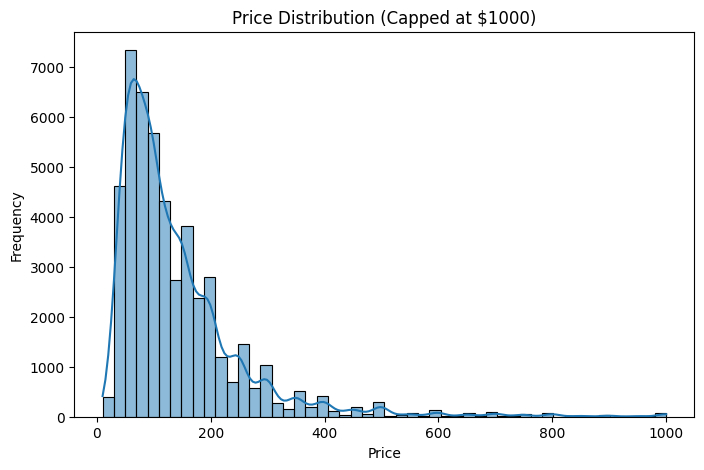

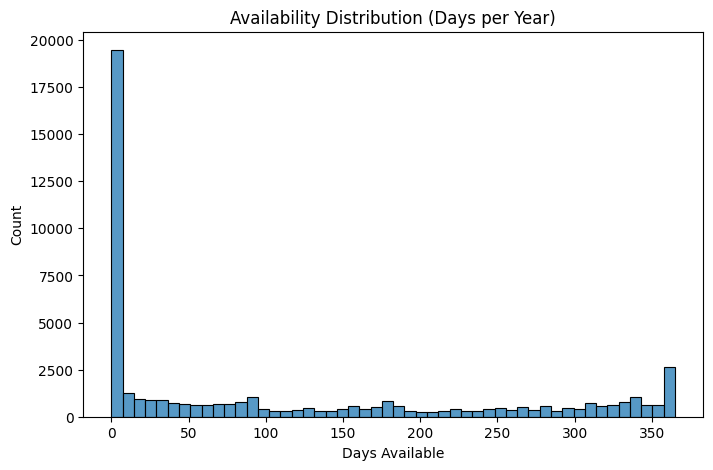

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution (Capped at $1000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Availability distribution
plt.figure(figsize=(8,5))
sns.histplot(df['availability_365'], bins=50, kde=False)
plt.title('Availability Distribution (Days per Year)')
plt.xlabel('Days Available')
plt.ylabel('Count')
plt.show()

### Dealing With Outliers

Now that we got a preview of the distribution of the prices with a cap at $1000, we must properly deal with the outliers by computing the IQR. After computing, we apply the upper and lower caps. Placing both the raw and filtered prices on graphs give a clear visual understanding of the difference in skew. The filtered graph shows a normal distribution.

In [14]:
# Keep a copy of raw price
df['price_raw'] = df['price'].copy()

# Compute IQR caps
q1, q3 = df['price'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_cap = max(0, q1 - 1.5 * iqr)
upper_cap = q3 + 1.5 * iqr

# Apply caps
df['price_capped'] = df['price'].clip(lower=lower_cap, upper=upper_cap)

print(f"IQR Caps -> lower: {lower_cap:.2f}, upper: {upper_cap:.2f}")
display(df[['price_raw','price_capped']].describe().round(2))


IQR Caps -> lower: 0.00, upper: 334.00


,price_raw,price_capped
count,48608.00,48608.00
mean,141.32,132.03
std,116.75,82.52
min,10.00,10.00
25%,69.00,69.00
50%,105.00,105.00
75%,175.00,175.00
max,1000.00,334.00


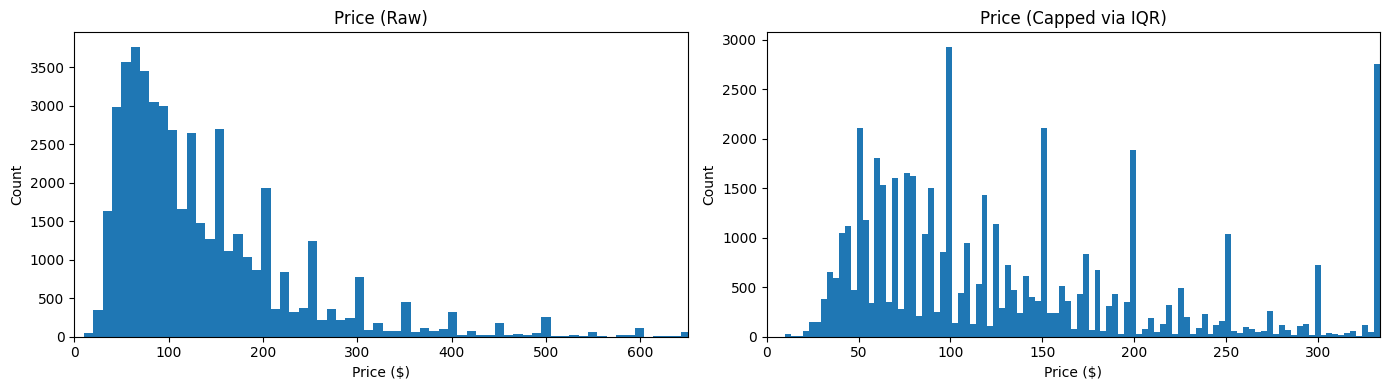

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14,4))

axes[0].hist(df['price_raw'], bins=100)
axes[0].set_title('Price (Raw)')
axes[0].set_xlim(0, df['price_raw'].quantile(0.99))

axes[1].hist(df['price_capped'], bins=100)
axes[1].set_title('Price (Capped via IQR)')
axes[1].set_xlim(0, df['price_capped'].quantile(0.99))

for ax in axes:
    ax.set_xlabel('Price ($)')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


### 2. Categorical Features Overview

Next, we compare listings across the five boroughs of NYC (Manhattan, Brooklyn, Queens, Bronx, Staten Island). We check both the number of listings and the average price in each area. This shows us which areas dominate the market and which are most expensive.

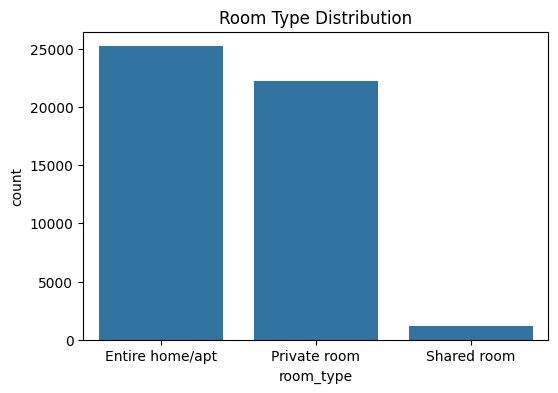

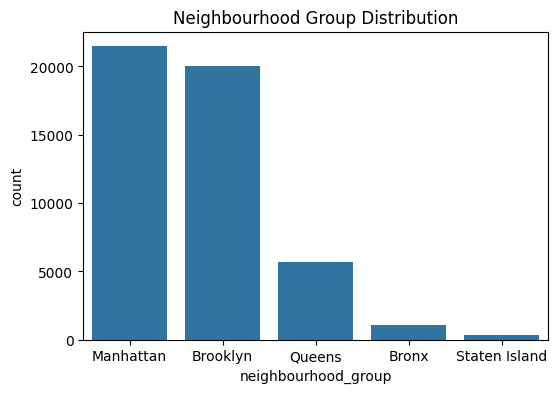

In [16]:
# Room type distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Room Type Distribution')
plt.show()

# Neighbourhood group distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title('Neighbourhood Group Distribution')
plt.show()

### 3. Price Variation by Categories

Room type (Entire home, Private room, Shared room) is one of the biggest factors in pricing. Here we look at the distribution of room types and compare their average prices. This tells us how supply and pricing differ depending on the kind of accommodation.

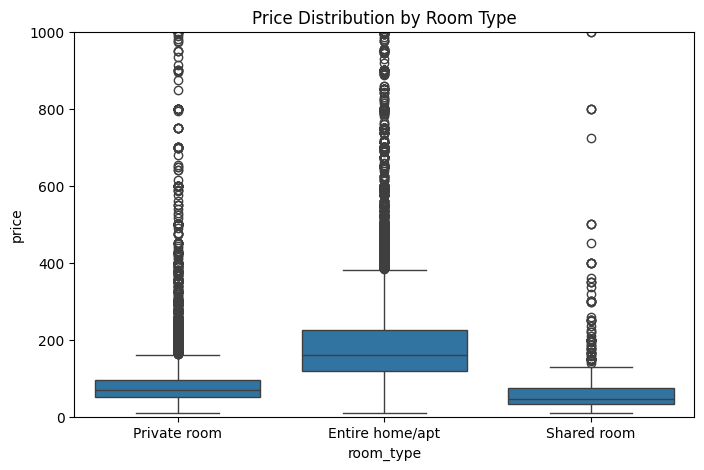

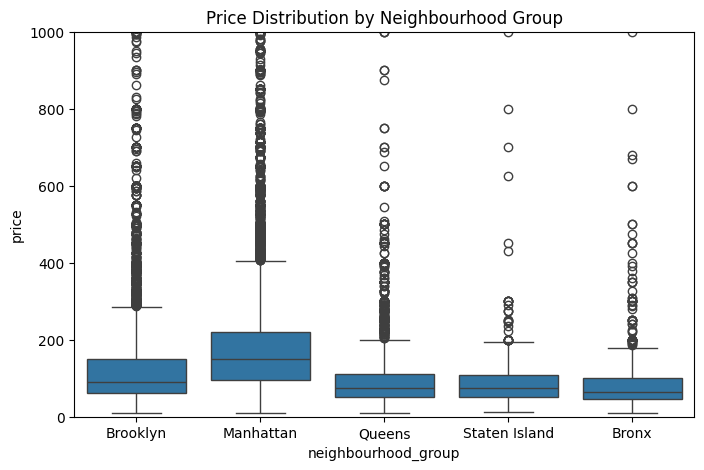

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='room_type', y='price')
plt.ylim(0,1000)
plt.title('Price Distribution by Room Type')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.ylim(0,1000)
plt.title('Price Distribution by Neighbourhood Group')
plt.show()

### 4. Geographic Insights

To better understand location dynamics, we plot listings by latitude and longitude. This map-style scatterplot shows where listings are concentrated, highlighting Airbnb “hotspots.” It helps reveal spatial patterns that raw numbers alone might miss.

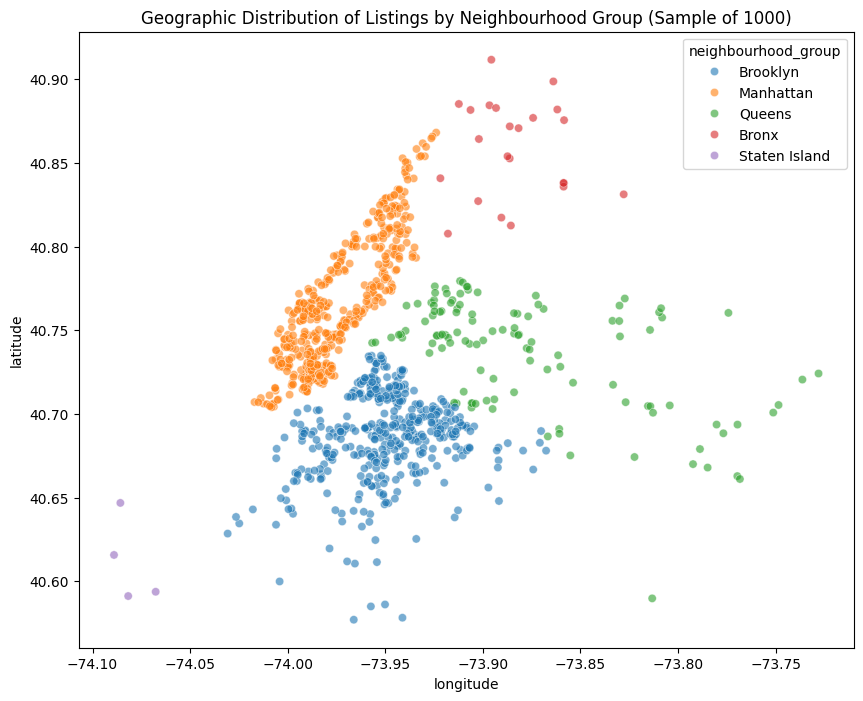

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df.sample(1000, random_state=42), x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.6)
plt.title('Geographic Distribution of Listings by Neighbourhood Group (Sample of 1000)')
plt.show()

### NYC Borough Heatmap

This interactive heatmap shows the density of Airbnb listings across different NYC boroughs.

Each borough has its own color-coded layer. We cab use the Layer Control to toggle borough visibility. The heatmap helps visualize which boroughs have higher listing densities.

In [19]:
import folium
from folium.plugins import HeatMap

# Base map centered on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Define colors for each borough
borough_colors = {
    "Manhattan": "red",
    "Brooklyn": "blue",
    "Queens": "green",
    "Bronx": "purple",
    "Staten Island": "orange"
}

# Create heatmap layers for each borough
for borough, color in borough_colors.items():
    borough_data = df[df["neighbourhood_group"] == borough][["latitude", "longitude"]].values
    if not borough_data.size:  # Skip if no data for borough
        continue
    heat_layer = HeatMap(borough_data, name=borough, radius=10, gradient={0.2: color, 1: color})
    nyc_map.add_child(heat_layer)

# Add layer control for toggling
folium.LayerControl().add_to(nyc_map)

# Display map
nyc_map

### 5. Correlation Analysis

Finally, we analyze host activity and reviews. We check how many listings each host manages, how often listings are available, and the number of reviews. This helps us see whether the market is dominated by casual hosts (with 1 listing) or professional ones (with many), and whether listings are actively in use.

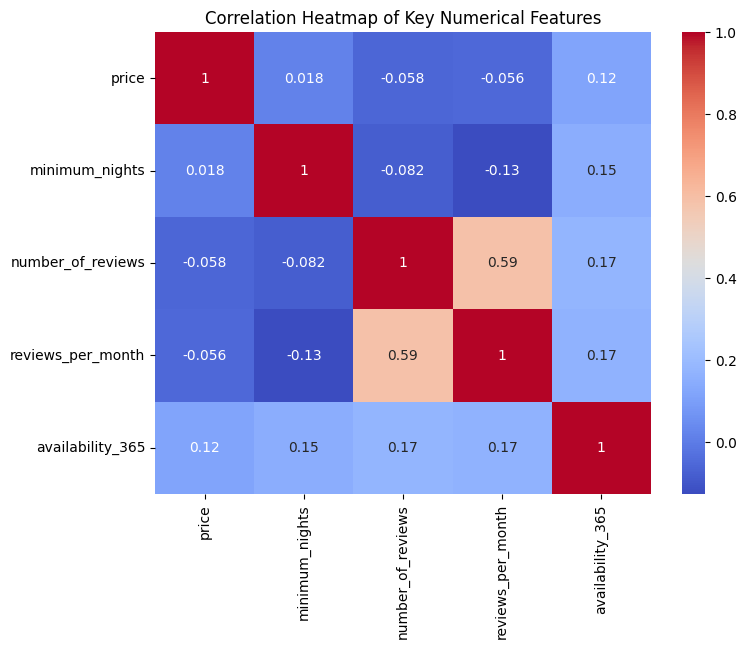

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Numerical Features')
plt.show()

### Borough-Level Summary
To get a quick understanding of the findings so far, we can calculate and put in a table the average and median pricings by borough, the average number of days available in the year, as well as the total listings. As expected, Manhattan leads with the most listings as well as the highest pricing followed by Brooklyn.

In [21]:
# Borough-Level Summary Table
borough_summary = df.groupby('neighbourhood_group').agg(
    avg_price=('price', 'mean'),
    median_price=('price', 'median'),
    avg_availability=('availability_365', 'mean'),
    total_listings=('id', 'count')
).round(2)

print("Borough-Level Summary Table:")
display(borough_summary)

Borough-Level Summary Table:


,avg_price,median_price,avg_availability,total_listings
neighbourhood_group,,,,
Bronx,85.33,65.0,165.73,1087
Brooklyn,117.88,90.0,100.04,20026
Manhattan,178.95,149.0,111.45,21470
Queens,95.03,75.0,144.33,5654
Staten Island,98.58,75.0,199.77,371


### Summary of EDA Findings
Our exploratory data analysis of the NYC Airbnb dataset revealed several key insights relevant to pricing and property performance:

Price Distribution-
Most Airbnb listings in NYC fall within a reasonable price range, but we observed extreme outliers at the high end. These skew the average price, so median values provide a more accurate measure of typical prices.

Neighborhood Insights-
Manhattan consistently commands the highest average prices, followed by Brooklyn, while Queens, the Bronx, and Staten Island have much lower average prices. This reflects location demand and perceived property value differences across boroughs.

Room Type Preferences-
Entire home/apartment listings dominate in price, whereas shared and private rooms cater to lower-budget travelers. This segmentation suggests distinct market segments for hosts to target.

Availability & Demand Patterns-
Listings with more availability days tend to have competitive pricing, indicating potential trade-offs between occupancy rates and nightly price levels.

Geospatial Trends-
A borough-level heatmap confirms that higher-priced listings cluster heavily in Manhattan and certain Brooklyn neighborhoods, illustrating clear geographic pricing patterns.

## Preprocessing for Modeling

Now that the EDA portion is completed, we must preprocess the data in preparation for the modeling phase. We will be confirming the target variable, choosing which features to keep, scaling the features, and then splitting the dataset into training and testing sets.

### 1.Feature Selection
First, we must select and keep only the features that would be helpful in prediction and drop the rest of the features such as the host id. We will also remove outliers and log-transform to reduce skewness of prices.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Select only relevant features
selected_features = [
    'neighbourhood_group', 'neighbourhood', 'room_type',
    'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'price'
]

df = df[selected_features].copy()
# Handle missing values
df['reviews_per_month'].fillna(0, inplace=True)

# Remove listings with invalid or extreme prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Log-transform the price to reduce skew
df['price'] = np.log1p(df['price'])  # log(1 + price) for stability


/tmp/ipython-input-3141976357.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


### 2. Separating Target Variable

We will be confirming and then separating the target variable first in order to not process it with the other features. This will also ensure that the training data will not be skewed.

In [23]:
# Define features (X) and target (y)
target = 'price'
X = df.drop(columns=[target])
y = df[target]

print("Target variable:", target)
print("Feature matrix shape before split:", X.shape)

Target variable: price
Feature matrix shape before split: (45876, 8)


### 3. Train-Test Split

In our next prepocessing step, we will be splitting the dataset into training and testing sets for unbiased evaluations of future modeling.

In [24]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (36700, 8)
Testing set shape: (9176, 8)


### 4. One-Hot Encode Categorical Variables/ Scaling Numerical Features

In order to ensure our model can interpret our categorical variables, we will be one-hot encoding them so that the model can interpret them numerically.

In [31]:
clip_values = {
    'minimum_nights': (0, 30),
    'reviews_per_month': (0, 10),
    'number_of_reviews': (0, 100),
    'calculated_host_listings_count': (0, 10),
    'availability_365': (0, 365)  # optional
}

for col, (low, high) in clip_values.items():
    X_train[col] = X_train[col].clip(lower=low, upper=high)
    X_test[col] = X_test[col].clip(lower=low, upper=high)

# One-hot encode categorical variables
categorical_cols = X_train.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", categorical_cols.tolist())

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align test set columns with training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


Categorical columns to encode: ['neighbourhood_group', 'neighbourhood', 'room_type']


### 5. Scaling Numerical Features

In order to improve model performance, and in preparation for certain algorithms, we will scale numerical features to ensure consistent ranges.

In [25]:
from sklearn.preprocessing import StandardScaler

numerical_cols = X_train.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


### End of Preprocessing
At this stage, we’ve cleaned and refined the dataset for modeling. We removed missing values, standardized column formats, handled outliers, and selected only the most informative features related to Airbnb listing performance.
The resulting dataset is now consistent, interpretable, and ready for encoding and model training in the next phase.

## Modeling Phase

In this phase of the project, we will build and evaluate three distinct machine learning models: Linear Regression, Random Forest,and Gradient Boosting. The purpose of creating multiple models is to explore different algorithmic approaches and determine which is most effective in solving the problem at hand.

### Model 1: LinearRegression (Baseline Model)

This is our simplest model which will serve as a baseline for comparison. It is simple, fast, and easy to interpret, making it useful for understanding the general linear relationships in the data.

In [32]:
X_train.head(10)

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Arden Heights,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
33662,0.000000,0.046156,0.682425,0.0,1.207038,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47186,0.000000,0.000000,1.170011,0.0,1.789861,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33701,1.145577,0.000000,0.447890,0.0,1.598143,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
47423,0.000000,0.000000,0.000000,0.0,0.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41208,0.000000,0.000000,0.620705,10.0,1.636486,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31631,0.000000,0.000000,0.046711,0.0,1.958572,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
23,0.000000,1.038569,0.000000,0.0,1.490781,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
20972,0.000000,2.097142,1.836584,0.0,0.000000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35636,0.000000,0.354906,1.947680,0.0,0.000000,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
13601,0.000000,2.714644,1.435406,0.0,1.651824,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train on the SCALED data
lr = LinearRegression()
lr_cv = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Cross-validation
cv_scores = cross_val_score(lr_cv, X_train, y_train, cv=5, scoring='r2')

# Evaluation (log-price scale)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Results (log-price scale):")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"CV R² mean: {cv_scores.mean():.4f}")

Linear Regression Results (log-price scale):
R²: 0.5853
MAE: 0.2835
RMSE: 0.3651
CV R² mean: 0.5849


### Model 2: RandomForest

Random Forest offers strong performance with robustness to noise, and is also good at capturing nonlinear patterns, so we implement this as well.

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
cv_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print('Random Forest Results:')
print('R2:', r2_rf)
print('MAE:', mae_rf)
print('RMSE:', rmse_rf)
print('CV R2 mean:', cv_rf.mean())

Random Forest Results:
R2: 0.5960340442720945
MAE: 0.2759646158280184
RMSE: 0.3603725743286943
CV R2 mean: 0.5914124113247231


### Model 3: GradientBoosting Regressor

Our last model will be Gradient Boosting, which is another ensemble tree-based technique that also typically offers higher predictive accuracy as it minimizes errors more aggressively.

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
cv_gb = cross_val_score(gb, X_train, y_train, cv=5, scoring='r2')

r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print('Gradient Boosting Results:')
print('R2:', r2_gb)
print('MAE:', mae_gb)
print('RMSE:', rmse_gb)
print('CV R2 mean:', cv_gb.mean())

Gradient Boosting Results:
R2: 0.6191078907537761
MAE: 0.27077494711399275
RMSE: 0.34992932319475534
CV R2 mean: 0.618276311563676


### Model Reasoning and Findings

Comparing the three models shows a clear progression in predictive performance. Linear Regression provided a solid baseline with an R² of 0.5853, but both ensemble methods outperformed it. Random Forest improved accuracy moderately, achieving an R² of 0.5960 and lower error metrics across the board. The best overall performance came from Gradient Boosting, which achieved the highest R² (0.6191), the lowest MAE, and the lowest RMSE, confirmed consistently by cross-validation results.

Overall, while the simple model was useful for interpretability and baseline comparison, the more complex Gradient Boosting model proved to be the most effective and practical choice for predicting log-transformed property prices in this dataset.